In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

caminho = "base/curitiba_apartment_real_estate_data.csv"

df_database = pd.read_csv(caminho)

In [2]:
display(df_database.head())

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,title,zipCode,lon,lat,street,neighborhood,poisList,yearlyIptu,monthlyCondoFee,price
0,77,90.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNIT...","Apartamento com 3 dormitórios, sendo uma suíte...",Apartamento para venda tem 77 metros quadrados...,82540130,-49.249319,-25.394261,Rua Nossa Senhora de Nazaré,Boa Vista,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",700.0,400.0,595000
1,53,53.0,NaN,1,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'GYM', '...",Apartamento ensolarado e com linda vista pro P...,Apartamento ensolarado com 3 quartos ao lado d...,81320180,-49.326716,-25.474533,Rua Alfredo José Pinto,Fazendinha,"['BS:Rua José Gonçalves Júnior, 182', 'BS:Rua ...",NaN,392.0,185000
2,113,NaN,1.0,4,3,2.0,"['POOL', 'BARBECUE_GRILL', 'ELEVATOR', 'GATED_...","22º andar, face Norte, linda vista para a Serr...",Apt para venda no Cond. Botânica: 113 m² com 3...,80050470,-49.239110,-25.437162,Rua Coronel Pedro Scherer Sobrinho,Cristo Rei,"['BS:Estação Hospital Cajuru', 'BS:Linha Turis...",240.0,550.0,1220000
3,93,106.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Apartamento Residencial com 70m2 interno total...,Apartamento Mobiliado de Porteira Fechada incl...,81210310,-49.335318,-25.442254,Rua Jeremias Maciel Perretto,Campo Comprido,"['BS:Estação-tubo Mossunguê', 'BS:Mossunguê', ...",400.0,600.0,610000
4,66,NaN,1.0,2,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'PETS_AL...",Excelente apto garden com 66m² de área útil em...,Apartamento Novo Mundo 66m² útil,81050150,-49.304465,-25.492857,Rua Deputado Waldemiro Pedroso,Novo Mundo,"['BS:Ponto - 672 Formosa', 'BS:Ponto - 615 Ube...",NaN,NaN,269990


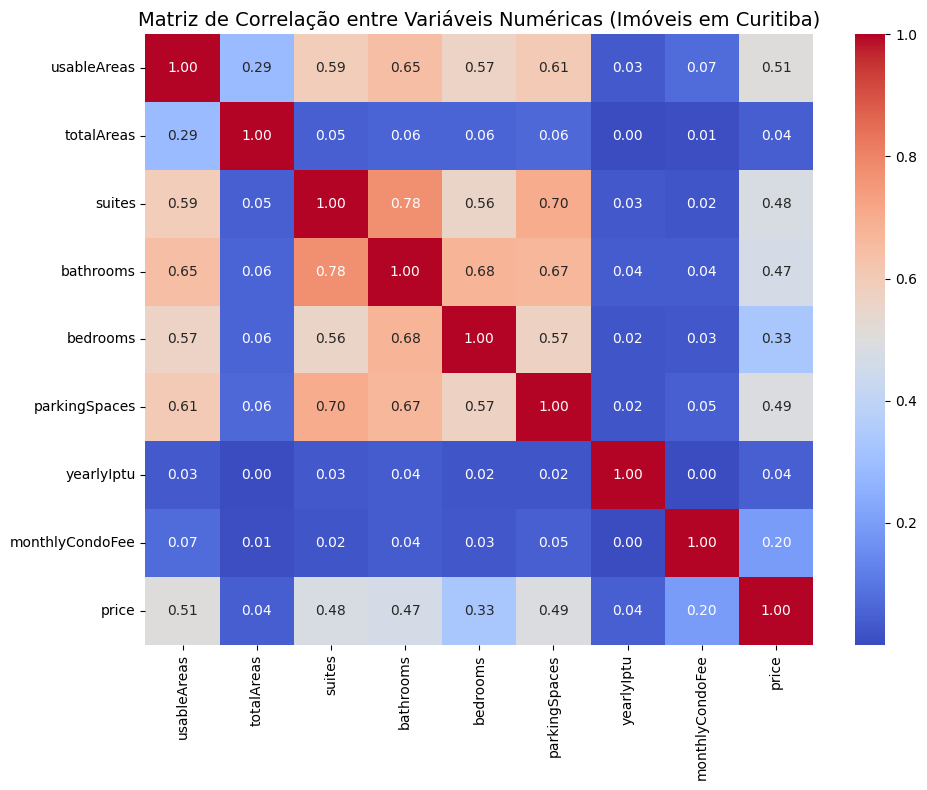

price              1.000000
usableAreas        0.507848
parkingSpaces      0.489893
suites             0.479667
bathrooms          0.466819
bedrooms           0.330324
monthlyCondoFee    0.195235
yearlyIptu         0.044556
totalAreas         0.040551
Name: price, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#apenas colunas numéricas relevantes para a correlação
numeric_cols = [
    "usableAreas", "totalAreas", "suites", "bathrooms",
    "bedrooms", "parkingSpaces", "yearlyIptu", "monthlyCondoFee", "price"
]

#dataframe apenas com as colunas numéricas
df_num = df_database[numeric_cols]

#remover valores NaN
df_num = df_num.dropna(how="all")

#calcular a matriz de correlação
corr_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas (Imóveis em Curitiba)", fontsize=14)
plt.tight_layout()
plt.show()

# Exibir as correlações do preço com as outras variáveis, ordenadas
corr_with_price = corr_matrix["price"].sort_values(ascending=False)
corr_with_price


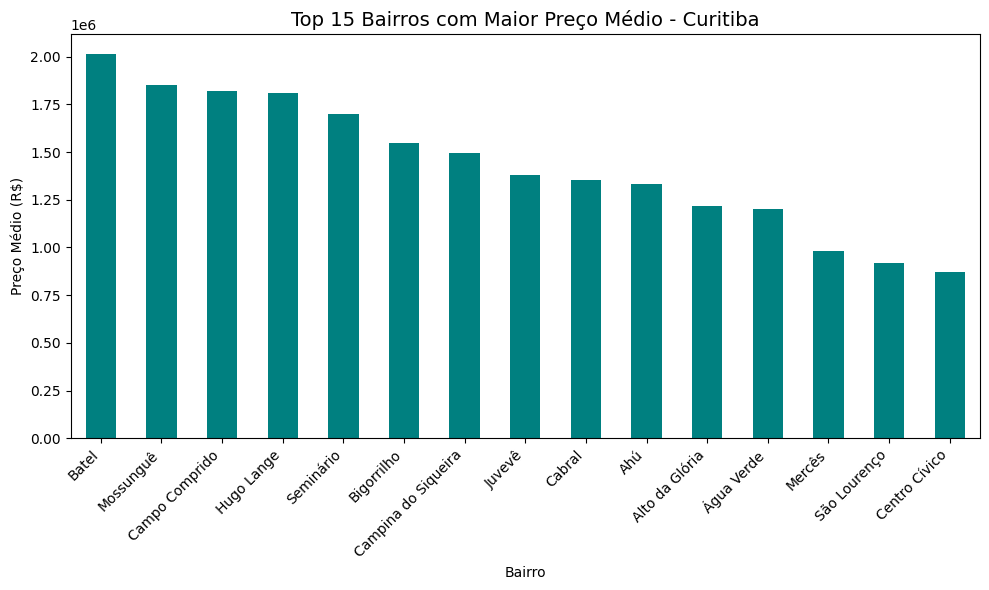

neighborhood
Batel                  2016433.15
Mossunguê              1851863.18
Campo Comprido         1818658.73
Hugo Lange             1810312.48
Seminário              1701640.39
Bigorrilho             1547915.30
Campina do Siqueira    1494999.28
Juvevê                 1380841.76
Cabral                 1352601.00
Ahú                    1332122.33
Name: price, dtype: float64

In [6]:
#analise geografica
geo_df = df_database[["price", "lat", "lon", "neighborhood"]].copy()

#removendo registros sem coordenadas
geo_df = geo_df.dropna(subset=["lat", "lon"])

#calcular preço médio por bairro
avg_price_by_neighborhood = geo_df.groupby("neighborhood")["price"].mean().sort_values(ascending=False)

#plotar os 15 bairros mais caros
plt.figure(figsize=(10, 6))
avg_price_by_neighborhood.head(15).plot(kind="bar", color="teal")
plt.title("Top 15 Bairros com Maior Preço Médio - Curitiba", fontsize=14)
plt.xlabel("Bairro")
plt.ylabel("Preço Médio (R$)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

avg_price_by_neighborhood.head(10).round(2)

In [ ]:
geo_calor_df = df_database.dropna(subset=["lat", "lon", "price"]).copy()

plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    geo_calor_df["lon"],
    geo_calor_df["lat"],
    c=geo_calor_df["price"],
    cmap="viridis",
    s=10,
    alpha=0.6
)

plt.colorbar(scatter, label="Preço do Imóvel (R$)")
plt.title("Mapa de Calor Geográfico - Preço dos Imóveis em Curitiba", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()